## Add libraries

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance

## Opening the dataset
It is important to understand the dataset before going deeper into the subsequent process. Here, we will explore the information about the dataset, such as number of samples, presence of missing values, class imbalance, etc.

In [192]:
# import package
# open dataset
filename = "./stroke-dataset.csv"
data = pd.read_csv(filename)
with pd.option_context('expand_frame_repr', False):
    print(data.head())
print("Data shape: {}".format(data.shape))

      id  gender    age  hypertension  heart_disease ever_married      work_type Residence_type  avg_glucose_level    bmi   smoking_status  stroke
0   9046    Male 67.000             0              1          Yes        Private          Urban            228.690 36.600  formerly smoked       1
1  51676  Female 61.000             0              0          Yes  Self-employed          Rural            202.210    NaN     never smoked       1
2  31112    Male 80.000             0              1          Yes        Private          Rural            105.920 32.500     never smoked       1
3  60182  Female 49.000             0              0          Yes        Private          Urban            171.230 34.400           smokes       1
4   1665  Female 79.000             1              0          Yes  Self-employed          Rural            174.120 24.000     never smoked       1
Data shape: (5110, 12)


In [193]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000,5110.000,5110.000,5110.000,5110.000,4909.000,5110.000
mean,36517.829,43.227,0.097,0.054,106.148,28.893,0.049
std,21161.722,22.613,0.297,0.226,45.284,7.854,0.215
min,67.000,0.080,0.000,0.000,55.120,10.300,0.000
25%,17741.250,25.000,0.000,0.000,77.245,23.500,0.000
50%,36932.000,45.000,0.000,0.000,91.885,28.100,0.000
75%,54682.000,61.000,0.000,0.000,114.090,33.100,0.000
max,72940.000,82.000,1.000,1.000,271.740,97.600,1.000


As shown above, the number of rows (samples) is 5110 and number of columns (variables) is 12. There are some missing values (indicated by NaN). Now, we want to check how many missing values exist in each variable.

In [194]:
miss_val = data.isnull().sum()/len(data)*100
print(miss_val)
print("# Missing values in variable bmi\t\t: {:.2f}%".format(miss_val['bmi']))
print("Data shape: {}".format(data.shape))

id                  0.000
gender              0.000
age                 0.000
hypertension        0.000
heart_disease       0.000
ever_married        0.000
work_type           0.000
Residence_type      0.000
avg_glucose_level   0.000
bmi                 3.933
smoking_status      0.000
stroke              0.000
dtype: float64
# Missing values in variable bmi		: 3.93%
Data shape: (5110, 12)


There is only one variable that contain missing values. 'bmi' accounts for 3.37% of overall samples. For missing values in 'bmi' variable, we will replace them with the average of 'bmi' values.

## Handling Missing Values

In [195]:
data["bmi"]=data["bmi"].fillna(data["bmi"].mean())
data.drop(columns="id", axis=1, inplace=True)
miss_val = data.isnull().sum()/len(data)*100
print(miss_val)
print("# Missing values in variable 'bmi'\t\t: {}".format(miss_val['bmi']))
print("Shape of data without missing values: {}".format(data.shape))

gender              0.000
age                 0.000
hypertension        0.000
heart_disease       0.000
ever_married        0.000
work_type           0.000
Residence_type      0.000
avg_glucose_level   0.000
bmi                 0.000
smoking_status      0.000
stroke              0.000
dtype: float64
# Missing values in variable 'bmi'		: 0.0
Shape of data without missing values: (5110, 11)


In [196]:
print(f"Unique 'gender': {data['gender'].unique()}")
print(f"Unique 'ever_married': {data['ever_married'].unique()}")
print(f"Unique 'work_type': {data['work_type'].unique()}")
print(f"Unique 'Residence_type': {data['Residence_type'].unique()}")
print(f"Unique 'smoking_status': {data['smoking_status'].unique()}")

Unique 'gender': ['Male' 'Female' 'Other']
Unique 'ever_married': ['Yes' 'No']
Unique 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique 'Residence_type': ['Urban' 'Rural']
Unique 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [197]:
# create encoder for each categorical variable
label_gender = LabelEncoder()
label_married = LabelEncoder()
label_work = LabelEncoder()
label_residence = LabelEncoder()
label_smoking = LabelEncoder()

In [198]:
data['gender'] = label_gender.fit_transform(data['gender'])
data['ever_married'] = label_married.fit_transform(data['ever_married'])
data['work_type'] = label_work.fit_transform(data['work_type'])
data['Residence_type'] = label_residence.fit_transform(data['Residence_type'])
data['smoking_status'] = label_smoking.fit_transform(data['smoking_status'])

with pd.option_context('expand_frame_repr', False):
    print(data.head())

   gender    age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level    bmi  smoking_status  stroke
0       1 67.000             0              1             1          2               1            228.690 36.600               1       1
1       0 61.000             0              0             1          3               0            202.210 28.893               2       1
2       1 80.000             0              1             1          2               0            105.920 32.500               2       1
3       0 49.000             0              0             1          2               1            171.230 34.400               3       1
4       0 79.000             1              0             1          3               0            174.120 24.000               2       1


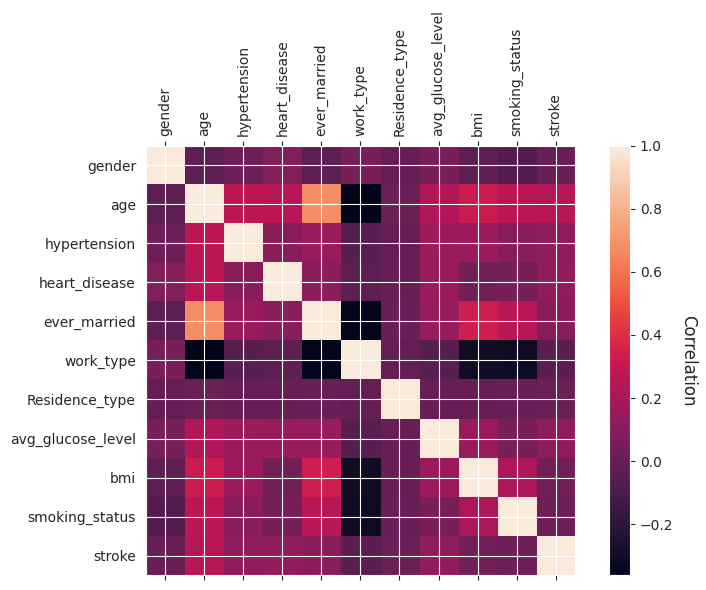

In [199]:
fig, ax = plt.subplots(figsize=(8,6))
im = ax.matshow(data.corr())
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[1]))
ax.set_xticklabels(data.columns,rotation=90)
ax.set_yticklabels(data.columns)
# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=12)
fig.tight_layout()
plt.show()

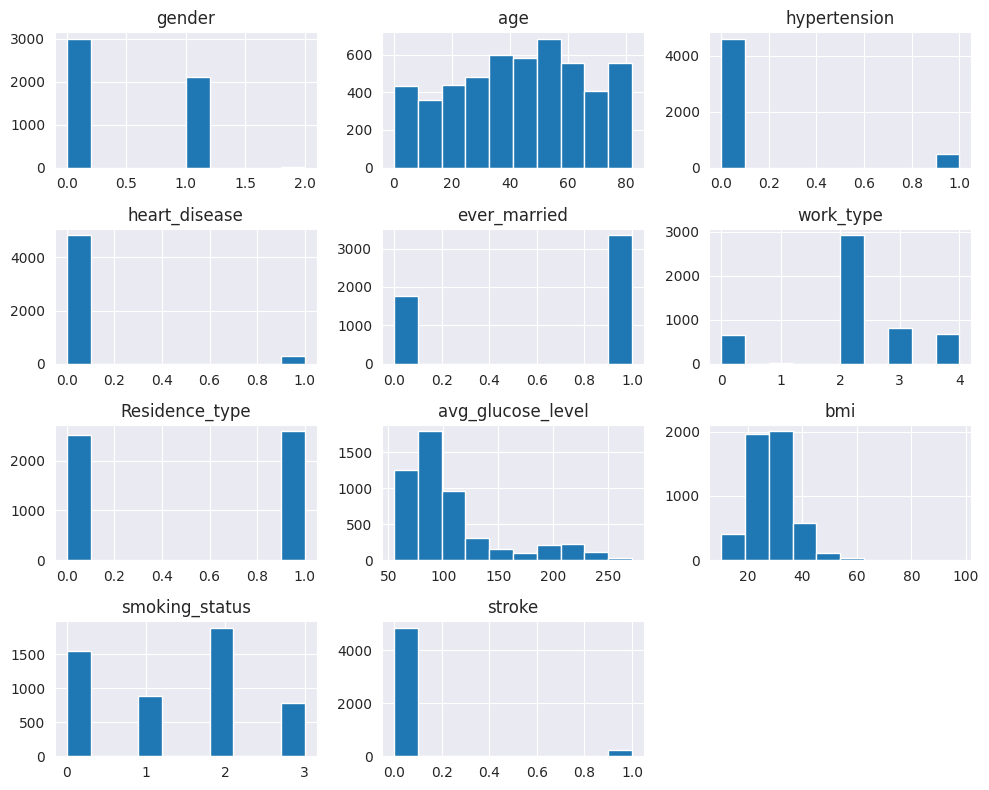

In [200]:
fig = data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

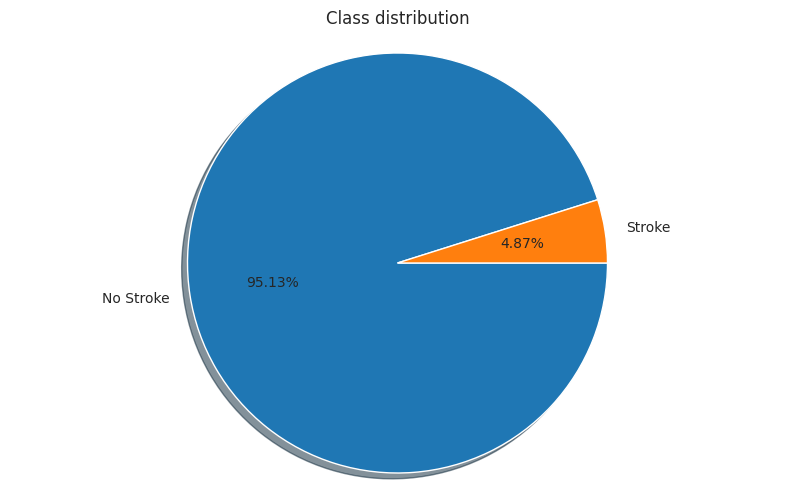

# samples associated with no stroke: 4861
# samples associated with stroke: 249


In [201]:
class_occur = data['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
_, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_occur[0]))
print("# samples associated with stroke: {}".format(class_occur[1]))

In [202]:
# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_resample(data.loc[:,data.columns!='stroke'], data['stroke'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (9722, 10)
Shape of y: (9722,)


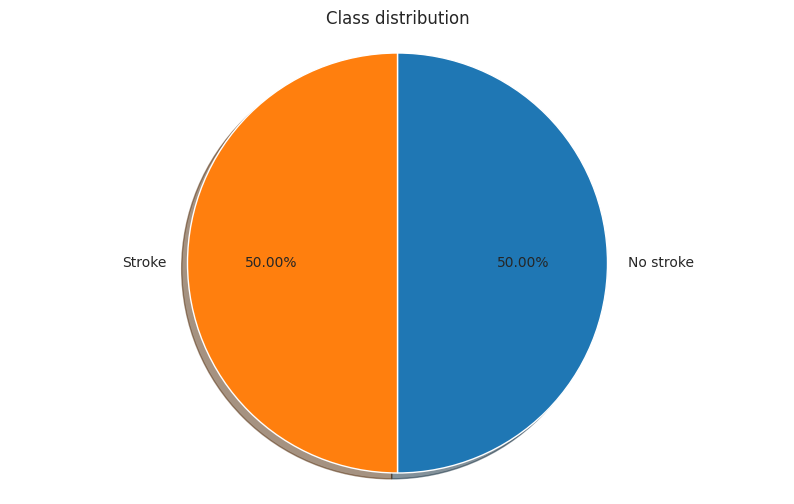

# samples associated with no stroke: 4861
# samples associated with stroke: 4861


In [203]:
_, class_counts = np.unique(y, return_counts=True)
class_names = ['No stroke', 'Stroke']
_, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

In [204]:
def split_train_valid_test(X,y,test_size=0.1,random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=test_size/(1-test_size), random_state=random_state, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

X_train, X_valid, X_test, y_train, y_valid, y_test = split_train_valid_test(X,y,test_size=0.1,random_state=42)
_, train_counts = np.unique(y_train, return_counts=True)
_, valid_counts = np.unique(y_valid, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
print("[train] # class 0: {} | # class 1: {}".format(train_counts[0],train_counts[1]))
print("[valid] # class 0: {} | # class 1: {}".format(valid_counts[0],valid_counts[1]))
print("[test]  # class 0: {} | # class 1: {}".format(test_counts[0],test_counts[1]))

[train] # class 0: 3888 | # class 1: 3888
[valid] # class 0: 486 | # class 1: 487
[test]  # class 0: 487 | # class 1: 486


In [205]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)

In [206]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)    
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity

In [207]:
start = timer.time()
svm_model = SVC(kernel='rbf',probability=True)
svm_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_svm = svm_model.predict(X_test_std)
y_svm_prob = svm_model.predict_proba(X_test_std)

Finished training within 3.72 seconds


Classification report for SVM: 
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       487
           1       0.85      0.90      0.87       486

    accuracy                           0.87       973
   macro avg       0.87      0.87      0.87       973
weighted avg       0.87      0.87      0.87       973

Confusion matrix for SVM: 
[[410  77]
 [ 50 436]]
Accuracy score for SVM: 0.87
Precision score for SVM: 0.85
Recall score for SVM: 0.90
F1 score for SVM: 0.87
Sensitivity score for SVM: 0.90
Specitivity score for SVM: 0.84
AUC score for SVM: 0.94


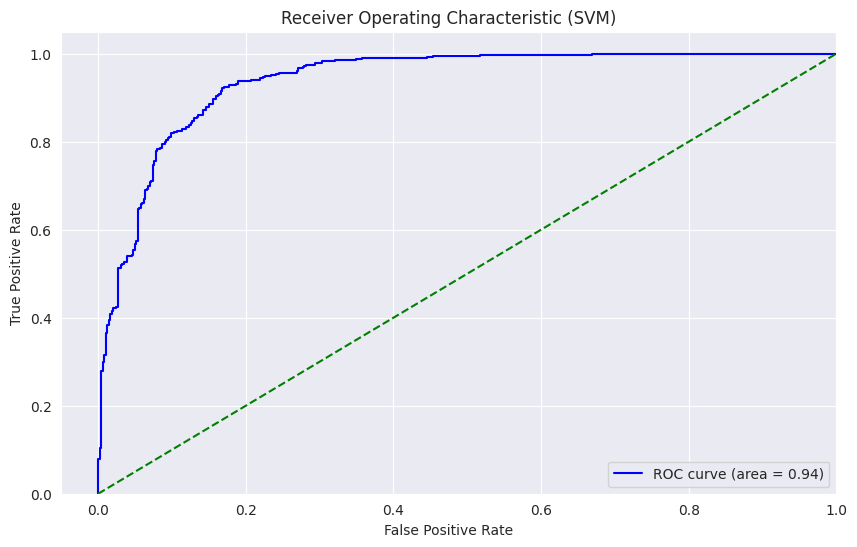

In [208]:
print("Classification report for SVM: \n{}".format(classification_report(y_test,y_svm)))
print("Confusion matrix for SVM: \n{}".format(confusion_matrix(y_test,y_svm)))
print("Accuracy score for SVM: {:.2f}".format(accuracy_score(y_test,y_svm)))
# calculate precision, recall, and f1 scores
prec_svm = precision_score(y_test,y_svm)
rec_svm = recall_score(y_test,y_svm)
f1_svm = f1_score(y_test,y_svm)
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))
# calculate sensitivity, specificity, and auc
sens_svm,spec_svm = calc_sens_spec(y_test,y_svm)
fpr, tpr, _ = roc_curve(y_test,  y_svm_prob[:,1])
auc_svm = roc_auc_score(y_test, y_svm_prob[:,1])
print("Sensitivity score for SVM: {:.2f}".format(sens_svm))
print("Specitivity score for SVM: {:.2f}".format(spec_svm))
print("AUC score for SVM: {:.2f}".format(auc_svm))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_svm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (SVM)')
ax.legend(loc="lower right")
plt.show()

In [209]:
start = timer.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_gnb = gnb_model.predict(X_test_std)
y_gnb_prob = gnb_model.predict_proba(X_test_std)

Finished training within 0.00 seconds


Classification report for GNB: 
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       487
           1       0.77      0.86      0.81       486

    accuracy                           0.80       973
   macro avg       0.81      0.80      0.80       973
weighted avg       0.81      0.80      0.80       973

Confusion matrix for GNB: 
[[362 125]
 [ 66 420]]
Accuracy score for GNB: 0.80
Precision score for GNB: 0.77
Recall score for GNB: 0.86
F1 score for GNB: 0.81
Sensitivity score for GNB: 0.86
Specitivity score for GNB: 0.74
AUC score for GNB: 0.89


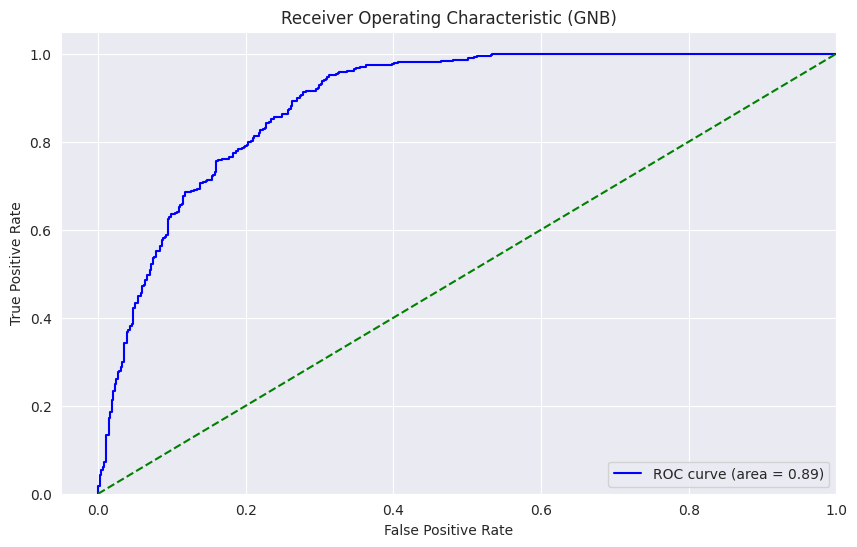

In [210]:
print("Classification report for GNB: \n{}".format(classification_report(y_test,y_gnb)))
print("Confusion matrix for GNB: \n{}".format(confusion_matrix(y_test,y_gnb)))
print("Accuracy score for GNB: {:.2f}".format(accuracy_score(y_test,y_gnb)))
# calculate precision, recall, and f1 scores
prec_gnb = precision_score(y_test,y_gnb)
rec_gnb = recall_score(y_test,y_gnb)
f1_gnb = f1_score(y_test,y_gnb)
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))
# calculate sensitivity, specificity, and auc
sens_gnb,spec_gnb = calc_sens_spec(y_test,y_gnb)
fpr, tpr, _ = roc_curve(y_test,  y_gnb_prob[:,1])
auc_gnb = roc_auc_score(y_test, y_gnb_prob[:,1])
print("Sensitivity score for GNB: {:.2f}".format(sens_gnb))
print("Specitivity score for GNB: {:.2f}".format(spec_gnb))
print("AUC score for GNB: {:.2f}".format(auc_gnb))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gnb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (GNB)')
ax.legend(loc="lower right")
plt.show()

In [211]:
start = timer.time()
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_logit = logit_model.predict(X_test_std)
y_logit_prob = logit_model.predict_proba(X_test_std)

Finished training within 0.04 seconds


Classification report for LR: 
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       487
           1       0.81      0.84      0.83       486

    accuracy                           0.82       973
   macro avg       0.82      0.82      0.82       973
weighted avg       0.82      0.82      0.82       973

Confusion matrix for LR: 
[[391  96]
 [ 77 409]]
Accuracy score for LR: 0.82
Precision score for LR: 0.81
Recall score for LR: 0.84
F1 score for LR: 0.83
Sensitivity score for LR: 0.84
Specitivity score for LR: 0.80
AUC score for LR: 0.90


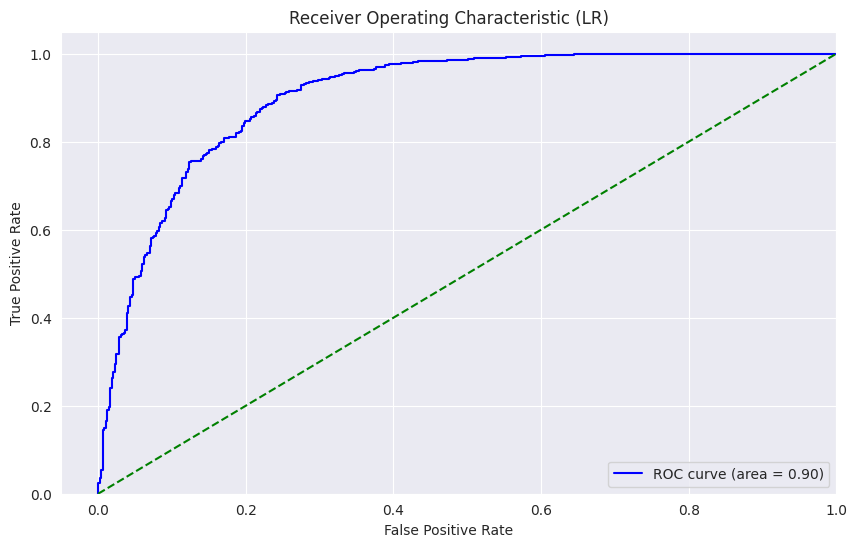

In [212]:
print("Classification report for LR: \n{}".format(classification_report(y_test,y_logit)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(y_test,y_logit)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(y_test,y_logit)))
# calculate precision, recall, and f1 scores
prec_logit = precision_score(y_test,y_logit)
rec_logit = recall_score(y_test,y_logit)
f1_logit = f1_score(y_test,y_logit)
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))
# calculate sensitivity, specificity, and auc
sens_logit,spec_logit = calc_sens_spec(y_test,y_logit)
fpr, tpr, _ = roc_curve(y_test,  y_logit_prob[:,1])
auc_logit = roc_auc_score(y_test, y_logit_prob[:,1])
print("Sensitivity score for LR: {:.2f}".format(sens_logit))
print("Specitivity score for LR: {:.2f}".format(spec_logit))
print("AUC score for LR: {:.2f}".format(auc_logit))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_logit)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LR)')
ax.legend(loc="lower right")
plt.show()

In [213]:
start = timer.time()
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_dtree = dtree_model.predict(X_test_std)
y_dtree_prob = dtree_model.predict_proba(X_test_std)

Finished training within 0.03 seconds


Classification report for DT: 
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       487
           1       0.90      0.94      0.92       486

    accuracy                           0.92       973
   macro avg       0.92      0.92      0.92       973
weighted avg       0.92      0.92      0.92       973

Confusion matrix for DT: 
[[435  52]
 [ 28 458]]
Accuracy score for DT: 0.92
Precision score for DT: 0.90
Recall score for DT: 0.94
F1 score for DT: 0.92
Sensitivity score for DT: 0.94
Specitivity score for DT: 0.89
AUC score for DT: 0.92


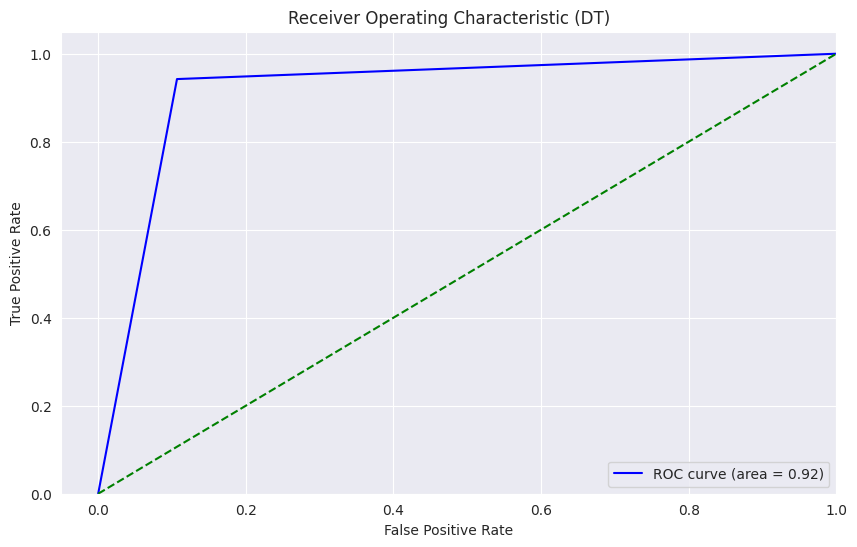

In [214]:
print("Classification report for DT: \n{}".format(classification_report(y_test,y_dtree)))
print("Confusion matrix for DT: \n{}".format(confusion_matrix(y_test,y_dtree)))
print("Accuracy score for DT: {:.2f}".format(accuracy_score(y_test,y_dtree)))
# calculate precision, recall, and f1 scores
prec_dtree = precision_score(y_test,y_dtree)
rec_dtree = recall_score(y_test,y_dtree)
f1_dtree = f1_score(y_test,y_dtree)
print("Precision score for DT: {:.2f}".format(prec_dtree))
print("Recall score for DT: {:.2f}".format(rec_dtree))
print("F1 score for DT: {:.2f}".format(f1_dtree))
# calculate sensitivity, specificity, and auc
sens_dtree,spec_dtree = calc_sens_spec(y_test,y_dtree)
fpr, tpr, _ = roc_curve(y_test,  y_dtree_prob[:,1])
auc_dtree = roc_auc_score(y_test, y_dtree_prob[:,1])
print("Sensitivity score for DT: {:.2f}".format(sens_dtree))
print("Specitivity score for DT: {:.2f}".format(spec_dtree))
print("AUC score for DT: {:.2f}".format(auc_dtree))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_dtree)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (DT)')
ax.legend(loc="lower right")
plt.show()

In [215]:
start = timer.time()
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test_std)
y_ranfor_prob = ranfor_model.predict_proba(X_test_std)

Finished training within 0.69 seconds


Classification report for RF: 
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       487
           1       0.94      0.97      0.96       486

    accuracy                           0.95       973
   macro avg       0.96      0.95      0.95       973
weighted avg       0.96      0.95      0.95       973

Confusion matrix for RF: 
[[459  28]
 [ 16 470]]
Accuracy score for RF: 0.95
Precision score for RF: 0.94
Recall score for RF: 0.97
F1 score for RF: 0.96
Sensitivity score for RF: 0.97
Specitivity score for RF: 0.94
AUC score for RF: 0.99


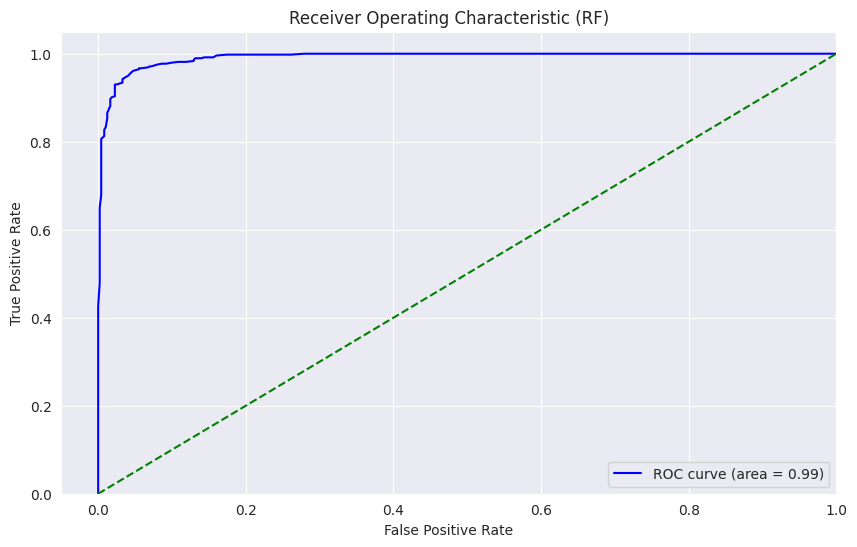

In [216]:
print("Classification report for RF: \n{}".format(classification_report(y_test,y_ranfor)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_ranfor)))
print("Accuracy score for RF: {:.2f}".format(accuracy_score(y_test,y_ranfor)))
# calculate precision, recall, and f1 scores
prec_ranfor = precision_score(y_test,y_ranfor)
rec_ranfor = recall_score(y_test,y_ranfor)
f1_ranfor = f1_score(y_test,y_ranfor)
print("Precision score for RF: {:.2f}".format(prec_ranfor))
print("Recall score for RF: {:.2f}".format(rec_ranfor))
print("F1 score for RF: {:.2f}".format(f1_ranfor))
# calculate sensitivity, specificity, and auc
sens_ranfor,spec_ranfor = calc_sens_spec(y_test,y_ranfor)
fpr, tpr, _ = roc_curve(y_test,  y_ranfor_prob[:,1])
auc_ranfor = roc_auc_score(y_test, y_ranfor_prob[:,1])
print("Sensitivity score for RF: {:.2f}".format(sens_ranfor))
print("Specitivity score for RF: {:.2f}".format(spec_ranfor))
print("AUC score for RF: {:.2f}".format(auc_ranfor))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ranfor)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RF)')
ax.legend(loc="lower right")
plt.show()

In [217]:
start = timer.time()
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_lgbm = lgbm_model.predict(X_test_std)
y_lgbm_prob = lgbm_model.predict_proba(X_test_std)

[LightGBM] [Info] Number of positive: 3888, number of negative: 3888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 792
[LightGBM] [Info] Number of data points in the train set: 7776, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Finished training within 0.06 seconds


Classification report for LGBM: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       487
           1       0.93      0.95      0.94       486

    accuracy                           0.94       973
   macro avg       0.94      0.94      0.94       973
weighted avg       0.94      0.94      0.94       973

Confusion matrix for LGBM: 
[[453  34]
 [ 24 462]]
Accuracy score for LGBM: 0.94
Precision score for LGBM: 0.93
Recall score for LGBM: 0.95
F1 score for LGBM: 0.94
Sensitivity score for LGBM: 0.95
Specitivity score for LGBM: 0.93
AUC score for LGBM: 0.99


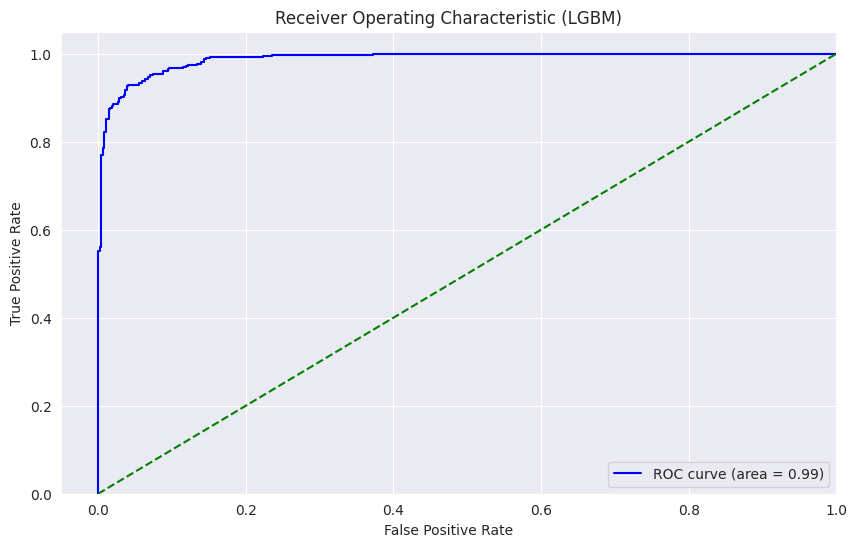

In [218]:
print("Classification report for LGBM: \n{}".format(classification_report(y_test,y_lgbm)))
print("Confusion matrix for LGBM: \n{}".format(confusion_matrix(y_test,y_lgbm)))
print("Accuracy score for LGBM: {:.2f}".format(accuracy_score(y_test,y_lgbm)))
# calculate precision, recall, and f1 scores
prec_lgbm = precision_score(y_test,y_lgbm)
rec_lgbm = recall_score(y_test,y_lgbm)
f1_lgbm = f1_score(y_test,y_lgbm)
print("Precision score for LGBM: {:.2f}".format(prec_lgbm))
print("Recall score for LGBM: {:.2f}".format(rec_lgbm))
print("F1 score for LGBM: {:.2f}".format(f1_lgbm))
# calculate sensitivity, specificity, and auc
sens_lgbm,spec_lgbm = calc_sens_spec(y_test,y_lgbm)
fpr, tpr, _ = roc_curve(y_test,  y_lgbm_prob[:,1])
auc_lgbm = roc_auc_score(y_test, y_lgbm_prob[:,1])
print("Sensitivity score for LGBM: {:.2f}".format(sens_lgbm))
print("Specitivity score for LGBM: {:.2f}".format(spec_lgbm))
print("AUC score for LGBM: {:.2f}".format(auc_lgbm))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_lgbm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LGBM)')
ax.legend(loc="lower right")
plt.show()